Functions

In [2]:
def visualize_meshgrid(x, y, target_func, title=None):
    X = np.array(np.meshgrid(x, y))
    Z = target_func(X)
    plt.pcolormesh(x,y,Z, cmap="inferno")
    plt.colorbar()
    if title:
        plt.title(title)
    plt.show()


def generate_sample(n, n_dims, lower, upper, target_func, noise_scale=0, random_state=42):
    """
    Generates data sample.
    """
    rs = np.random.RandomState(random_state)
    X = rs.rand(n_dims,n)
    for i in range(n_dims):
        X[i] = X[i]*(upper[i]-lower[i]) + lower[i]
    y = target_func(X)
    y += rs.normal(0, noise_scale, size=y.shape)
    
    return (X,y)

Generate data sample

In [3]:
import numpy as np

target_func = lambda X: (20 + X**2 - 10 * np.cos(2*np.pi*X)).sum(axis=0)

n_dims = 2
lower_bound = -2.5, -1.5
upper_bound = +1.5, +2.5

In [4]:
X_train, y_train = generate_sample(70, n_dims, lower_bound, upper_bound, target_func)

In [5]:
X_test, y_test = generate_sample(1000, n_dims, lower_bound, upper_bound, target_func, random_state=111)

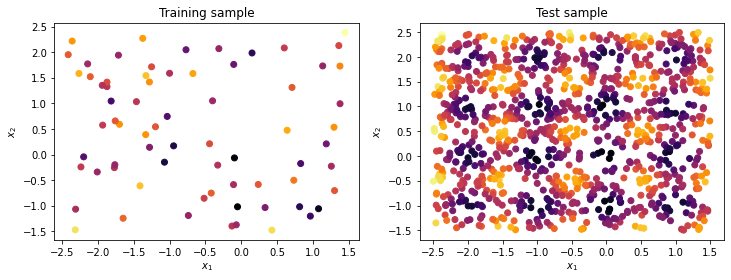

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[0], X_train[1], c=y_train, cmap="inferno")
plt.title("Training sample")
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.subplot(122)
plt.scatter(X_test[0], X_test[1], c=y_test, cmap="inferno")
plt.title("Test sample")
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
plt.show()

Train Default Gaussian Process Model

In [9]:
def obj_func(func, **args):
    return lambda x: func(x, **args)[0]

def de_func(func, bounds, x0):
    res = differential_evolution(obj_func(func), bounds)
    return res.x, res.fun

In [14]:
import scipy

scipy.__version__

'1.6.2'

In [40]:
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.optimize import differential_evolution
# from scipy.optimize import 
from sklearn.gaussian_process.kernels import RBF

gpr = GaussianProcessRegressor(optimizer=lambda func, thetas, bounds: de_func(func, bounds, x0=thetas), kernel=RBF())
gpr.fit(X_train.T, y_train)
gpr.kernel_.theta
y_pred = gpr.predict(X_train.T)


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y_train, y_pred)}
          R2 Score: {r2_score(y_train, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -34188.434990189846
          Mean Squared Error: 1.0033929718903369e-16
          R2 Score: 1.0



In [16]:
y_pred_test = gpr.predict(X_test.T)
print(f'''Test Errors:
          Log Marginal Likelihood: {gpr.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y_test, y_pred_test)}
          R2 Score: {r2_score(y_test, y_pred_test)}
''')

Test Errors:
          Log Marginal Likelihood: -34188.434990189846
          Mean Squared Error: 142.12259715682083
          R2 Score: -0.3430160761038503



In [17]:
gpr.kernel_.theta

array([-1.06992389])

In [18]:
m = np.arange(-2.5,1.5,0.01)
p = np.arange(-1.5,2.5,0.01)
X = np.array(np.meshgrid(m, p))
Y = np.zeros((400,400))
for i in range(len(X.T)):
    Y[i] = gpr.predict(X.T[i])

<ipython-input-19-394fc11f8184>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.array(np.meshgrid(m, p))[0], np.array(np.meshgrid(m, p))[1], Y, cmap="inferno")


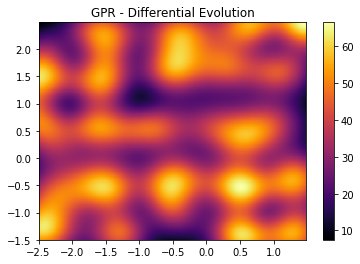

In [19]:
plt.pcolormesh(np.array(np.meshgrid(m, p))[0], np.array(np.meshgrid(m, p))[1], Y, cmap="inferno")
plt.colorbar()
plt.title("GPR - Differential Evolution")
plt.show()

<ipython-input-20-a9ed0603c83a>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.array(np.meshgrid(m, p))[0], np.array(np.meshgrid(m, p))[1], Y, cmap="inferno")


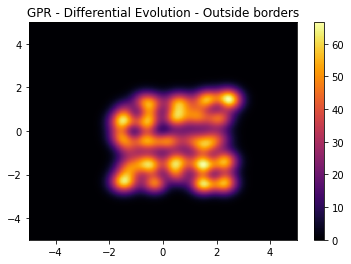

In [20]:
m = np.arange(-5,5,0.01)
p = np.arange(-5,5,0.01)
X_ = np.array(np.meshgrid(m, p))
Y = np.zeros((len(m),len(p)))
for i in range(len(X_.T)):
    Y[i] = gpr.predict(X_.T[i])

plt.pcolormesh(np.array(np.meshgrid(m, p))[0], np.array(np.meshgrid(m, p))[1], Y, cmap="inferno")
plt.colorbar()
plt.title("GPR - Differential Evolution - Outside borders")
plt.show()

In [21]:
gpr.kernel_.theta

array([-1.06992389])

Groundtruth

<ipython-input-2-b11073edba8d>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,Z, cmap="inferno")


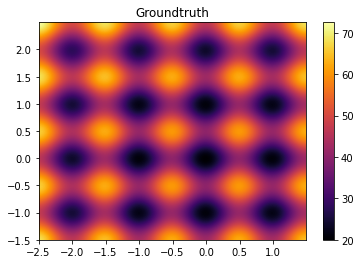

In [22]:
m = np.arange(-2.5,1.5,0.001)
p = np.arange(-1.5,2.5,0.001)
visualize_meshgrid(m, p, target_func, title='Groundtruth')

In [16]:
def random_search(func, bounds, max_its):
   

    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [17]:
gpr = GaussianProcessRegressor(optimizer=random_search, kernel=RBF())
gpr.fit(X_train.T, y_train)
y_pred = gpr.predict(X_train.T)

TypeError: random_search() got an unexpected keyword argument 'bounds'

In [ ]:
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y_train, y_pred)}
          R2 Score: {r2_score(y_train, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -538550275.748918
          Mean Squared Error: 2.8955831280340573e-05
          R2 Score: 0.9999997076874468



2022-07-21 18:16:14,266 - pyswarms.single.global_best - INFO - Optimize for [0.] iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 2}


TypeError: only integer scalar arrays can be converted to a scalar index

array([10., 10.])

In [92]:
def random_search_2(obj_func, init_theta, bounds):
   
    # number of iterations
    max_its = 10
    # optimal thetas
    theta_opt = []
    # optimal log likelyhood, starts with a very bad value
    func_min = -10000000000000
    # current log likelyhood
    func_current = 0
    # current thetas
    thetas = []
    rs = np.random.RandomState(42)

    for i in range(0, max_its):
        thetas = []
        for a in range(0, init_theta.shape[0]):
            thetas.append(np.random.uniform(bounds[0][0],bounds[0][1]))

        func_current = obj_func(thetas)[0]

        if func_current > func_min:
            func_min = func_current
            theta_opt = thetas
        
    return theta_opt, func_min

In [93]:
gpr = GaussianProcessRegressor(optimizer=random_search_2, kernel=RBF())
gpr.fit(X_train.T, y_train)
y_pred = gpr.predict(X_train.T)

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
print(f'''Training Errors:
          Log Marginal Likelihood: {gpr.log_marginal_likelihood_value_}
          Mean Squared Error: {mean_squared_error(y_train, y_pred)}
          R2 Score: {r2_score(y_train, y_pred)}
''')

Training Errors:
          Log Marginal Likelihood: -32866542725540.742
          Mean Squared Error: 93.90012708396057
          R2 Score: 0.05206707322691673

